### 1 Python Libraries
_(25 points)_ The Fourier Trigonometric Series of an integrable function $f(x)$ on $(0, 2P)$ is written as

$$
f(x) \approx \frac{a_0}{2} + \sum_{k=1}^{n} \left[a_k \cos \left(\frac{2\pi kx}{P}\right) +  b_k \sin \left(\frac{2\pi kx}{P}\right) \right],
$$

where
$$
\begin{align}
    a_0 &= \frac{2}{P} \int_{0}^{P} f(x)\\
    a_k &= \frac{2}{P} \int_{0}^{P} f(x) \cos \left(\frac{2\pi kx}{P}\right) dx; k \geq 1\\
    b_k &= \frac{2}{P} \int_{0}^{P} f(x) \sin \left(\frac{2\pi kx}{P}\right) dx.\\
\end{align}
$$

Write a Pyton function **FourierSeries(f, P, x, n)** that returns the values of the Fourier series of the function $f(x)$ at the point $x$. Plot the Fourier series of the following functions

$$
\begin{align}
    f(x) &= 1 - x,\\
    f(x) &= x^2,
\end{align}
$$

using $P = 1$, but calculate the series on the interval $(0, 2P)$. Repeat the plot for $n = 6, 12, 36, 124$. What you observe as $n$ becomes larger?

In [8]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# I had to put this to remove the warnning message from scipy of 'too many divisions'
import warnings
warnings.filterwarnings('ignore')

In [9]:
def FourierSeries(f, P, x, n):
    a_0 = 2/P * integrate.quad(f, 0, P)[0]
    y = np.zeros(n)
    
    f_1 = lambda a: f(a)*np.cos(2*np.pi*k*a/P)
    f_2 = lambda a: f(a)*np.sin(2*np.pi*k*a/P)
    
    for k in range(1, n):
        a_k = 2/P*integrate.quad(f_1, 0, P)[0]
        b_k = 2/P*integrate.quad(f_2, 0, P)[0]
        y += a_k * np.cos(2*np.pi*k*x/P) + b_k * np.sin(2*np.pi*k*x/P)
    y += a_0/2
    
    return y

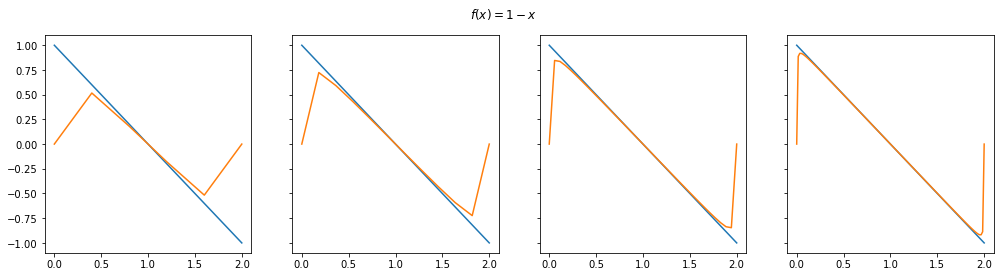

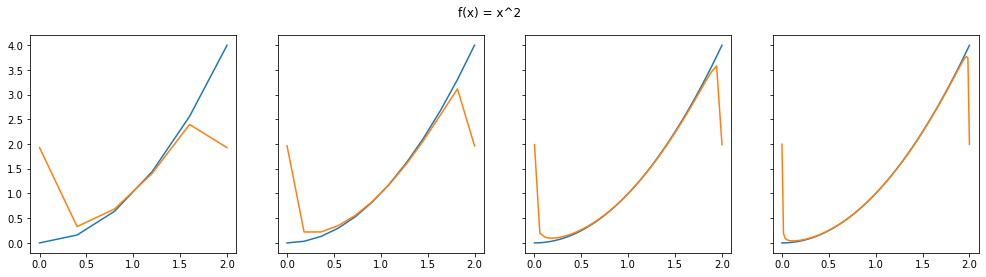

In [17]:
P = 2*1
N = [6, 12, 36, 124]

l_n = len(N)

F = [lambda a: 1 - a, lambda a: a**2]
titles = [r'$f(x) = 1 - x$', r'f(x) = x^2']

t = 0
for f in F:
    fig, axs = plt.subplots(1, l_n, figsize=(17, l_n), sharey=True)
    
    fig.suptitle(titles[t])
    
    t+=1
    i = 0
    for n in N:
        x = np.linspace(0, P, n)
        y_r = f(x)
        axs[i].plot(x, y_r)
        y = FourierSeries(f, P, x, n)
        axs[i].plot(x,y)
        i += 1

In general we see that as $n$ increases (which mean more series terms) the approximation got better, but this happens up to some point, after some number of iterations the runtime starts showin warnnings about too many divisions, eventually this divisions add up ending on a greater error that spread on the later computations. On the extremes is not clear the reason why the series seem to diverge.

on the first function we see that the last result has this wave pattern that is not present on the second function, after looking at scipy documentation,the integration is numeric which is why some errors are introduced as I explained on the previous paragraph, but just to check we can compute the entire series on sympy at $n=124$ and compare the results.

## The execution of the next code needs some time to compute...

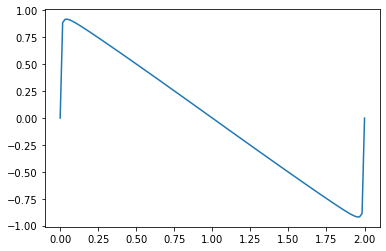

In [18]:
import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

init_printing(use_unicode=False, wrap_line=False)

"""
    Takes a SymPy Function f on (0, P) and returns the values of the Fourier
    series of the function f(x) at the point x.
"""
def FourierTrigonometricSeries2(f, P, x, n):
    a_0 = (2/P) * integrate(f, (x, 0, P))
    acum = a_0    
    for k in range(1, n+1):
        a_k = (2/P) * integrate(f * cos(2*pi*k*x/P), (x, 0, P))        
        b_k = (2/P) * integrate(f * sin(2*pi*k*x/P), (x, 0, P))
        acum = acum + a_k*cos(2*pi*k*x/P) + b_k*sin(2*pi*k*x/P)
    return acum

#Parameters
f = 1-x

fseries_fn = FourierTrigonometricSeries2(f, P, x, 124)

dom = np.linspace(0, P, 124)

y = [fseries_fn.subs(x, i).evalf() for i in dom]

plt.plot(dom, y)

plt.show()

As we can see this plot has not any wavy pattern, visually we verified that the error is introduced probably by mixture of rounding errors and the error added due to the integration of numeric method lets take a look at what happens if we use larger numbers...

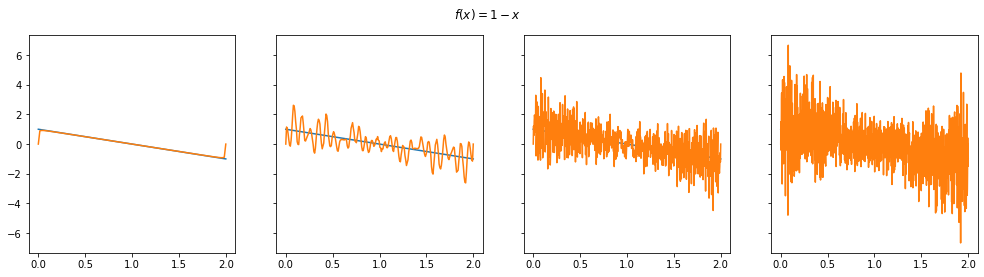

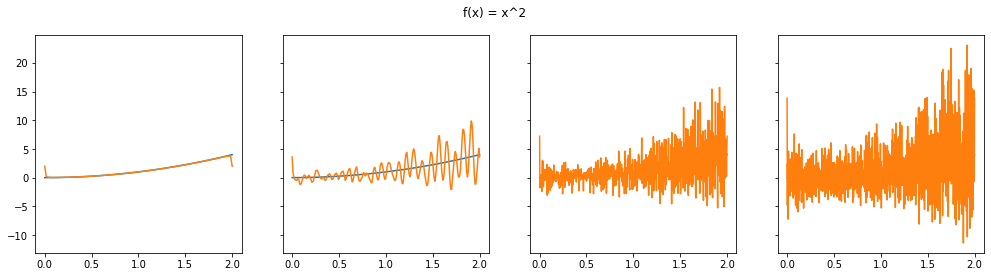

In [20]:
#Unfortunatetly i have to redefine my previous code... due to sympy imports. 
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# I had to put this to remove the warnning message from scipy of 'too many divisions'
import warnings
warnings.filterwarnings('ignore')

def FourierSeries(f, P, x, n):
    a_0 = 2/P * integrate.quad(f, 0, P)[0]
    y = np.zeros(n)
    
    f_1 = lambda a: f(a)*np.cos(2*np.pi*k*a/P)
    f_2 = lambda a: f(a)*np.sin(2*np.pi*k*a/P)
    
    for k in range(1, n):
        a_k = 2/P*integrate.quad(f_1, 0, P)[0]
        b_k = 2/P*integrate.quad(f_2, 0, P)[0]
        y += a_k * np.cos(2*np.pi*k*x/P) + b_k * np.sin(2*np.pi*k*x/P)
    y += a_0/2
    
    return y

P = 2*1
N = [124, 248, 596, 1192]

l_n = len(N)

F = [lambda a: 1 - a, lambda a: a**2]
titles = [r'$f(x) = 1 - x$', r'f(x) = x^2']

t = 0
for f in F:
    fig, axs = plt.subplots(1, l_n, figsize=(17, l_n), sharey=True)
    
    fig.suptitle(titles[t])
    
    t+=1
    i = 0
    for n in N:
        x = np.linspace(0, P, n)
        y_r = f(x)
        axs[i].plot(x, y_r)
        y = FourierSeries(f, P, x, n)
        axs[i].plot(x,y)
        i += 1

### 2 Mathematical Preliminaries
_(10 points)_ Test the stability of the zero solution for the following system
$$
\begin{align}
    x_1' &= -4x_1 + 8x_1 x_2^2\\
    x_2' &= -12x_1^2 x_2 - 6x_2 
\end{align}
$$

To test the stability i will use one of the tests given on the class notes. We can consider this a two dimensional autonomous system, and propose the following $v = x_1^2 + x_2^2$, such that 
$$
\begin{align}
    v^* &= 2x_1(-4x_1 + 8x_1 x_2^2) + 2x_2(-12x_1^2x_2 - 6x_2)\\
        &= -8x_1^2 + 16x_1^2 x_2^2 - 24 x_1^2 x_2^2 - 12x_2^2\\
        &= -8x_1^2 - 8 x_1^2 x_2^2 - 12x_2^2,
\end{align}
$$

$v$ is positive definite and $v^*(x) = -8x_1^2 - 8 x_1^2 x_2^2 - 12x_2^2 \leq 0$ for any $x \neq 0$, therefore by theorem 1: _if there exists a positive definite scalar function $v(x)$ such that $v^*(x) \leq 0$, on $S_r$, then the zero solution of the system is stable_, the zero solution of the system is stable.

_(15 points)_ Test the linear stability of the zero solution $x_1 ( t ) = 0$, $x_2 ( t ) = 0$ in the Lotka-Volterra population model, i.e.,
$$
\begin{align}
    x_1' &= ax_1 - x_1 x_2\\
    x_2' &= -bx_2 + x_1 x_2,
\end{align}
$$

for your favorite pair of integers $(a, b)$. _Suggestion:_ for one of the two critical points will find, try to shift the origin to that critical point, by a simple coordinate transformation, and construct a Lyapunov function.

I choose $a=2$ and $b=5$, then
$$
\begin{align}
    x_1' &= 2x_1 - x_1 x_2\\
    x_2' &= -5x_2 + x_1 x_2,
\end{align}
$$

_note: I was not sure about how to do this part with the suggestion, so i reviewed the notes and other material and found about the linearization of problem to perform the stability analysis._
$$
J = 
\begin{bmatrix}
    2 - x_2 & -x_1\\
    x_2 & -5 + x_1
\end{bmatrix}_{x_1=x_2=0}
=
\begin{bmatrix}
    2 & 0\\
    0 & -5
\end{bmatrix}
$$

### first approach
$$
\det(J - \lambda I) = 
\begin{vmatrix}
    2 - \lambda& 0\\
    0 & -5 - \lambda
\end{vmatrix}
 = (\lambda - 2) (\lambda + 5),
$$

Therefore $\lambda_1 = 2$ and $\lambda_2 = -5$, wich indicates that we have a saddle point.